In [362]:
# Load the necessarry libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [363]:
#load dataset
df = pd.read_csv('titanic.csv')

In [364]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [365]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [366]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [368]:
df[['Age',"Sex"]].sample(n=10)

,Age,Sex
190,34.00,male
211,NaN,male
178,36.00,female
373,44.00,male
66,18.00,female
313,37.00,female
250,0.92,female
280,23.00,female
149,30.00,male
153,36.00,female


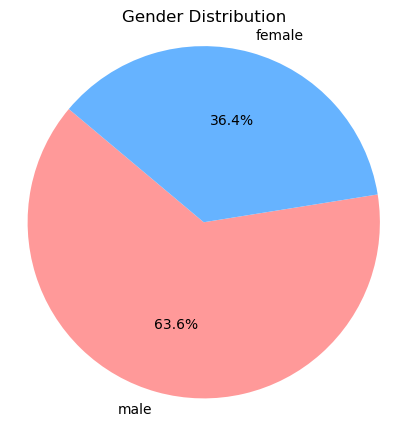

In [369]:
# Count the number of males and females
gender_counts = df['Sex'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [370]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [371]:
# filing missing data for Age

df['Age'] = df.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.mean()))


In [372]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

c:\Users\Adolf.Odhiambo\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


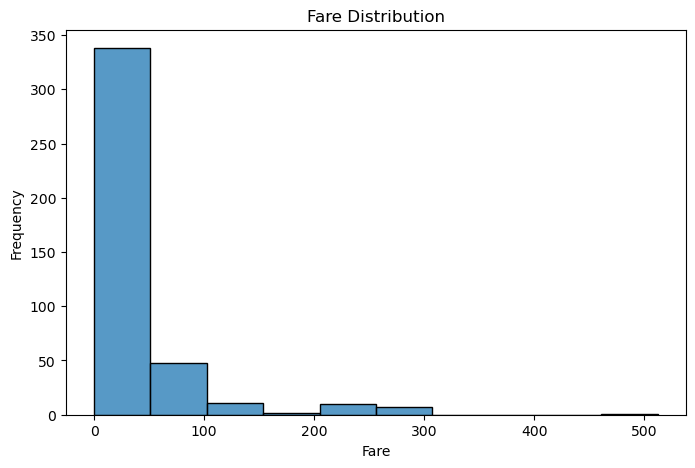

In [373]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], bins=10, kde=False)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

c:\Users\Adolf.Odhiambo\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


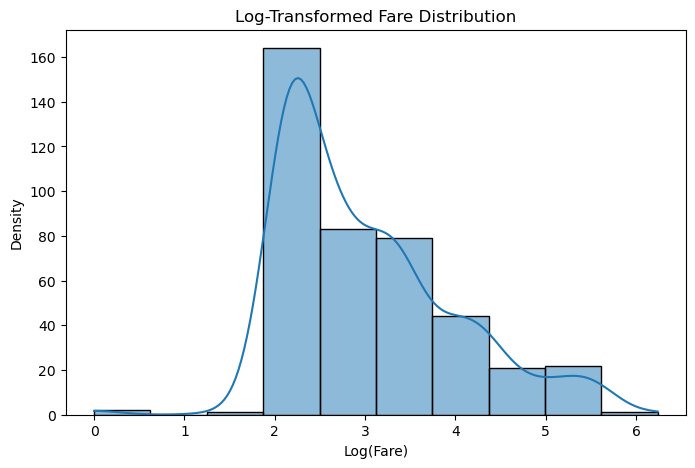

In [374]:
# Using log transformation for better visualization

# Apply log transformation (add 1 to avoid log(0))
df['log_fare'] = np.log1p(df['Fare'])

# Plot log-transformed data
plt.figure(figsize=(8, 5))
sns.histplot(df['log_fare'], bins=10, kde=True)
plt.title('Log-Transformed Fare Distribution')
plt.xlabel('Log(Fare)')
plt.ylabel('Density')
plt.show()


In [375]:
# Calculate the mode of the Age column
age_mode = df['Fare'].mode()[0]  # Get the first mode
age_mode
# Fill missing values in the Age column with the mode
df['Fare'].fillna(age_mode, inplace=True)

In [376]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
log_fare         1
dtype: int64

In [377]:
df.drop('log_fare', axis=1, inplace=True)


In [378]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [379]:
df['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [380]:

#make null cabins to be unknown 

df['Cabin'].fillna('Unknown', inplace=True)


In [381]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [382]:
## Identify Categorical data
df.sample(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,1071,1,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.000000,0,2,PC 17756,83.1583,E45,C
200,1092,1,3,"Murphy, Miss. Nora",female,30.272362,0,0,36568,15.5000,Unknown,Q
45,937,0,3,"Peltomaki, Mr. Nikolai Johannes",male,25.000000,0,0,STON/O 2. 3101291,7.9250,Unknown,S
109,1001,0,2,"Swane, Mr. George",male,18.500000,0,0,248734,13.0000,F,S
379,1271,0,3,"Asplund, Master. Carl Edgar",male,5.000000,4,2,347077,31.3875,Unknown,S
395,1287,1,1,"Smith, Mrs. Lucien Philip (Mary Eloise Hughes)",female,18.000000,1,0,13695,60.0000,C31,S
212,1104,0,2,"Deacon, Mr. Percy William",male,17.000000,0,0,S.O.C. 14879,73.5000,Unknown,S
298,1190,0,1,"Loring, Mr. Joseph Holland",male,30.000000,0,0,113801,45.5000,Unknown,S
370,1262,0,2,"Giles, Mr. Edgar",male,21.000000,1,0,28133,11.5000,Unknown,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.000000,0,0,7538,9.2250,Unknown,S


In [383]:


# Assuming your DataFrame is named df
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [384]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,418.000000,418,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,77,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,Unknown,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,327,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272597,0.447368,0.392344,NaN,35.560497,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,12.634534,0.896760,0.981429,NaN,55.857145,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,23.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,30.272362,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.471875,NaN,NaN


C (Cherbourg): Passengers who boarded the Titanic at Cherbourg, France.
Q (Queenstown): Passengers who boarded the Titanic at Queenstown, Ireland.
S (Southampton): Passengers who boarded the Titanic at Southampton, England.

##### Categorical Features
- Name: Each passenger has a unique name.
- Sex: Two unique values - male and female.
- Ticket: Many unique ticket numbers.
- Cabin: Many unique cabin numbers, with a high frequency of missing values (represented as 'Unknown').
- Embarked: Three unique values - S (Southampton), C (Cherbourg), Q (Queenstown).
#####  Numerical Features
- PassengerId: Unique identifier for each passenger.
- Survived: Binary indicator (0 or 1) of whether the passenger survived.
- Pclass: Passenger class (1, 2, or 3).
- Age: Age of the passenger.
- SibSp: Number of siblings/spouses aboard.
- Parch: Number of parents/children aboard.
- Fare: Fare paid by the passenger.

In [385]:
# Binary encoding sex 
# df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

df['Sex'] =  df['Sex'].map({'male': 1, 'female': 0})


In [386]:
 
df['Cabin_Section'] = df['Cabin'].str[0]     # Extract first letter of the cabin

cabin_dummies = pd.get_dummies(df['Cabin_Section'], prefix='Cabin')
df = pd.concat([df, cabin_dummies], axis=1)


In [387]:
df['Cabin_Section'].unique()

array(['U', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [388]:
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)
# One-Hot Encoding:

In [389]:
# Dropping unnecessary columns: Name, Ticket, Embarked
df.drop(['Name', 'Ticket', 'Embarked','Cabin','PassengerId'], axis=1, inplace=True)



# The "Ticket" column contains many unique ticket numbers, each one different.

# Why Encode: Since each ticket is unique, it doesn't provide useful information for predictions. Like the "Name" column, it doesn't contribute to patterns the model can use.

# Action:  drop this column as it won’t add value for predictive tasks.

In [390]:
df.sample(n=10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_Section,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
72,1,3,0,29.000000,0,0,7.9250,U,False,False,False,False,False,False,False,True,False,False,True
157,1,3,0,23.000000,0,0,7.8542,U,False,False,False,False,False,False,False,True,False,False,True
231,1,1,0,21.000000,0,0,26.5500,U,False,False,False,False,False,False,False,True,False,False,True
139,0,3,1,40.000000,1,6,46.9000,U,False,False,False,False,False,False,False,True,False,False,True
276,0,2,1,28.000000,0,0,10.5000,U,False,False,False,False,False,False,False,True,False,False,True
132,1,3,0,30.272362,0,4,25.4667,U,False,False,False,False,False,False,False,True,False,False,True
239,1,1,0,48.000000,1,0,106.4250,C,False,False,True,False,False,False,False,False,True,False,False
343,1,1,0,58.000000,0,1,512.3292,B,False,True,False,False,False,False,False,False,True,False,False
26,1,1,0,22.000000,0,1,61.9792,B,False,True,False,False,False,False,False,False,True,False,False
19,1,3,0,45.000000,0,0,7.2250,U,False,False,False,False,False,False,False,True,True,False,False


In [391]:
# One-hot encoding Cabin_Section
cabin_dummies = pd.get_dummies(df['Cabin_Section'], prefix='Cabin_Section')
df = pd.concat([df, cabin_dummies], axis=1)

# Drop the original Cabin_Section column
df.drop('Cabin_Section', axis=1, inplace=True)



In [393]:
# Final DataFrame
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,...,Embarked_Q,Embarked_S,Cabin_Section_A,Cabin_Section_B,Cabin_Section_C,Cabin_Section_D,Cabin_Section_E,Cabin_Section_F,Cabin_Section_G,Cabin_Section_U
0,0,3,1,34.500000,0,0,7.8292,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1,1,3,0,47.000000,1,0,7.0000,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2,0,2,1,62.000000,0,0,9.6875,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0,3,1,27.000000,0,0,8.6625,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,1,3,0,22.000000,1,1,12.2875,False,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,1,30.272732,0,0,8.0500,False,False,False,...,False,True,False,False,False,False,False,False,False,True
414,1,1,0,39.000000,0,0,108.9000,False,False,True,...,False,False,False,False,True,False,False,False,False,False
415,0,3,1,38.500000,0,0,7.2500,False,False,False,...,False,True,False,False,False,False,False,False,False,True
416,0,3,1,30.272732,0,0,8.0500,False,False,False,...,False,True,False,False,False,False,False,False,False,True


C:\Users\Adolf.Odhiambo\AppData\Local\Temp\ipykernel_13636\4283753283.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))


                 Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived         1.000000 -0.108615 -1.000000 -0.000014  0.099943  0.159120   
Pclass          -0.108615  1.000000  0.108615 -0.440782  0.001087  0.018721   
Sex             -1.000000  0.108615  1.000000  0.000014 -0.099943 -0.159120   
Age             -0.000014 -0.440782  0.000014  1.000000 -0.079535 -0.045074   
SibSp            0.099943  0.001087 -0.099943 -0.079535  1.000000  0.306895   
Parch            0.159120  0.018721 -0.159120 -0.045074  0.306895  1.000000   
Fare             0.192229 -0.577491 -0.192229  0.323839  0.172034  0.230411   
Cabin_A          0.017617 -0.196426 -0.017617  0.131622 -0.023554 -0.014196   
Cabin_B          0.060134 -0.319284 -0.060134  0.168187  0.051938  0.107455   
Cabin_C          0.112625 -0.454994 -0.112625  0.274427  0.099729 -0.024072   
Cabin_D          0.007813 -0.236878 -0.007813  0.135968 -0.012552 -0.043590   
Cabin_E          0.024919 -0.223270 -0.024919  0.082

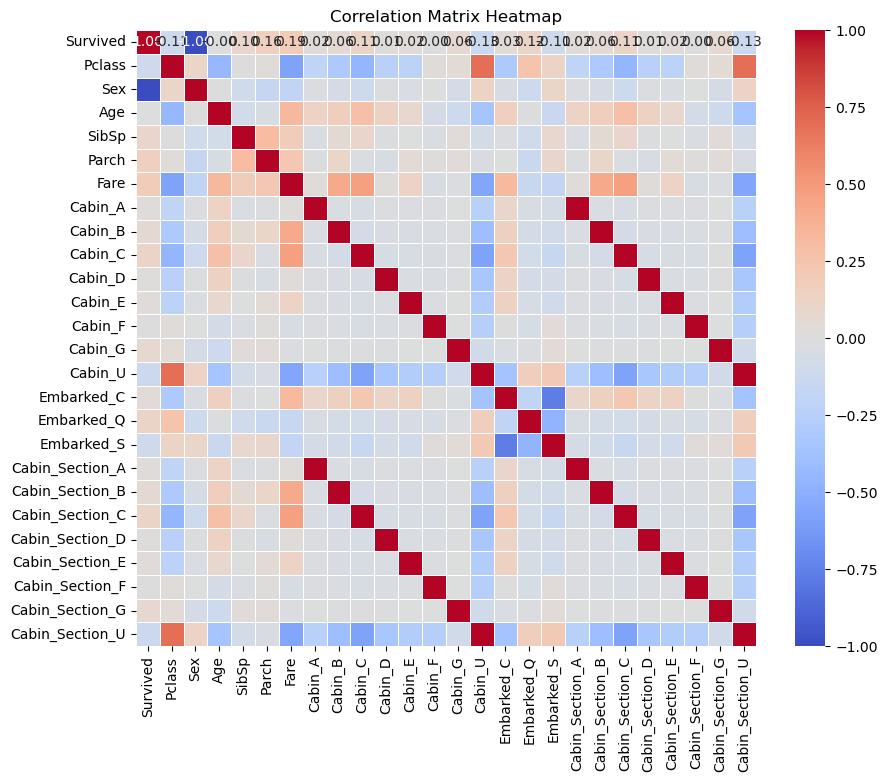

In [396]:
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

correlation_matrix = df.corr()

print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

- **Survived and Sex (-1.000):** There is a very strong negative correlation between "Survived" and "Sex." Since correlation coefficients range from -1 to 1, this value indicates that one of the genders (likely male) had a much lower survival rate compared to the other (likely female).

- **Survived and Pclass (-0.109):** There is a weak negative correlation between "Survived" and "Pclass" (passenger class). This suggests that lower-class passengers (higher number in class) were slightly less likely to survive, but the relationship is not very strong.

- **Pclass and Age (-0.441):** There is a moderate negative correlation between "Pclass" and "Age." This indicates that passengers in higher classes (Pclass = 1, 2) tended to be older, whereas lower-class passengers were likely younger.

- **Survived and Age (-0.00001):** There is essentially no correlation between "Survived" and "Age," meaning age did not significantly influence survival in this dataset.

- **Survived and SibSp (0.100):** There is a weak positive correlation between "Survived" and the number of siblings/spouses aboard (SibSp). This suggests that passengers with siblings or spouses on board were slightly more likely to survive.

- **Fare and Pclass (-0.577):** There is a strong negative correlation between "Fare" and "Pclass," indicating that passengers in higher classes paid higher fares.

- **Cabin Correlations:** Various cabin sections show weak correlations with survival. For example, Cabin_C has a slightly positive correlation with "Survived" (0.113), indicating passengers in this cabin section were more likely to survive.


c:\Users\Adolf.Odhiambo\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


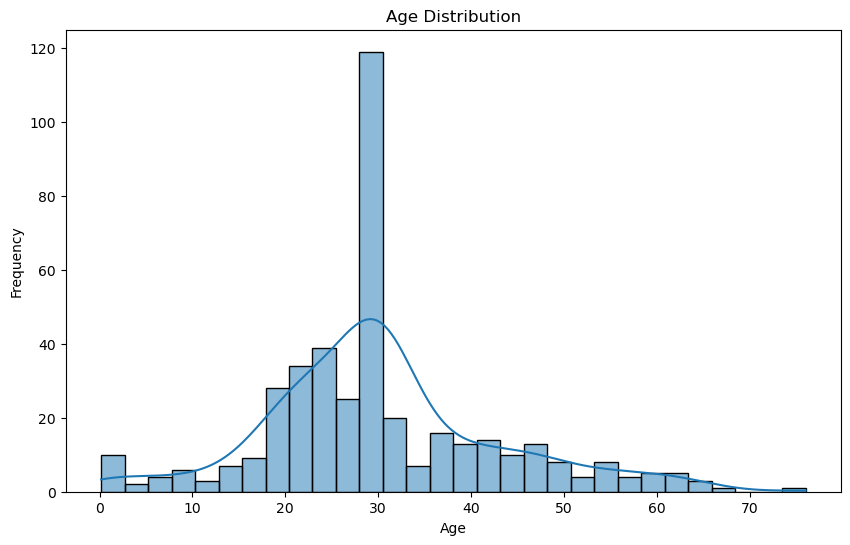

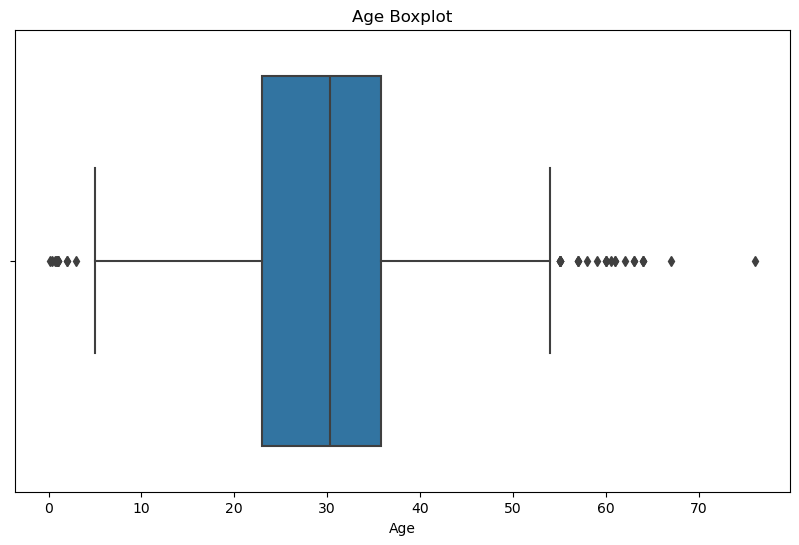

In [397]:


# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot to identify outliers in Age
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Age Boxplot')
plt.xlabel('Age')
plt.show()

c:\Users\Adolf.Odhiambo\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


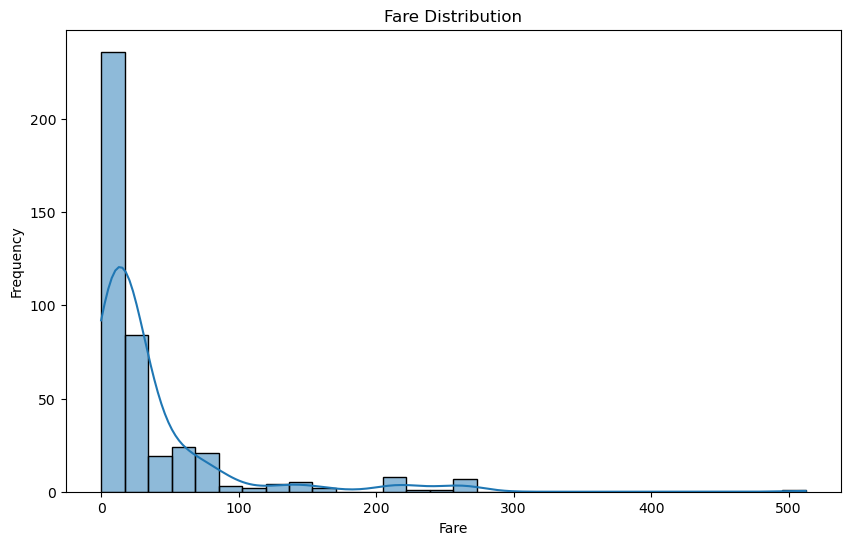

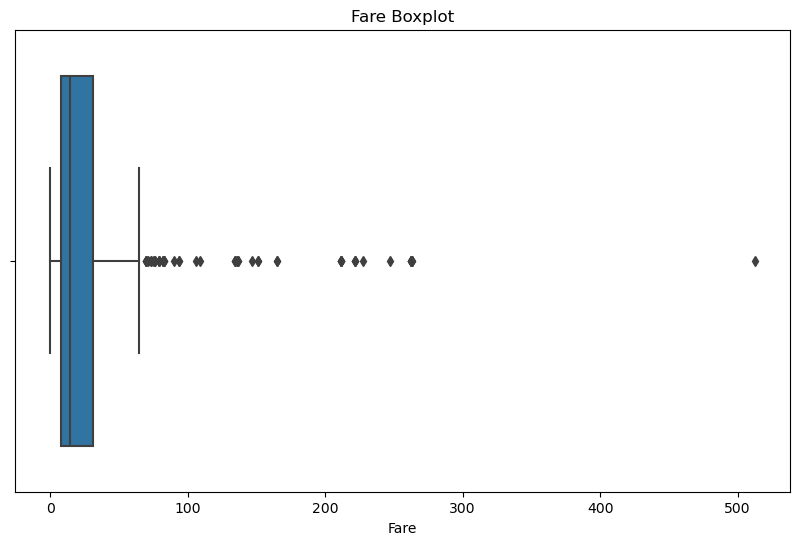

In [398]:
# Distribution of Fare
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Boxplot to identify outliers in Fare
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fare'])
plt.title('Fare Boxplot')
plt.xlabel('Fare')
plt.show()

c:\Users\Adolf.Odhiambo\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Adolf.Odhiambo\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.int64' object has no attribute 'startswith'

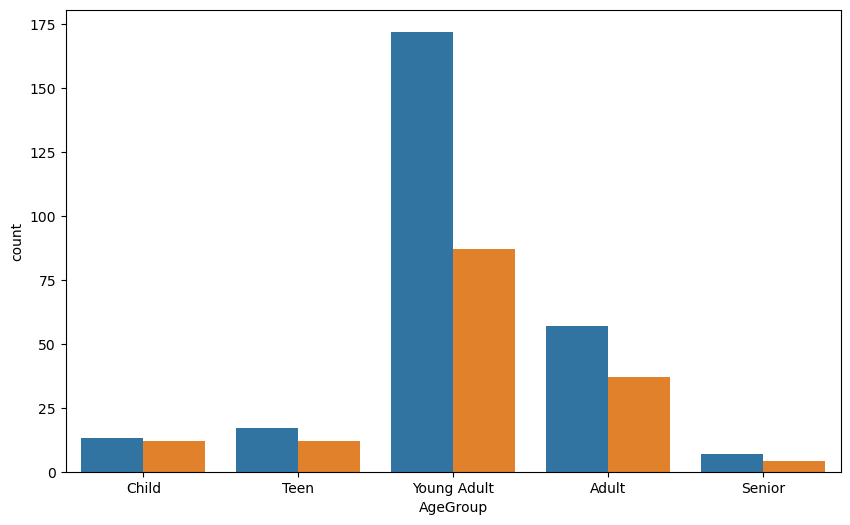

In [400]:
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# Survival rate by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeGroup', hue='Survived')
plt.title('Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [401]:
# Survival rate by Embarkation Point
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.show()

ValueError: Could not interpret input 'Embarked'

<Figure size 1000x600 with 0 Axes>